# Task M10 T01
## Web Scraping

#### - Exercise 1

Perform web scraping of two of the three proposed web pages using BeautifulSoup first and Selenium afterwards.

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (do a search first and scrape some content)

**WEB "http://quotes.toscrape.com" WITH BEAUTIFULSOUP**

In [10]:
import requests
from bs4 import BeautifulSoup

URL = "http://quotes.toscrape.com/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

quotes = soup.find_all(class_="quote")

#print(page.text)

for quote in quotes:
    text = quote.find(class_="text").text.strip()
    author = quote.find(class_="author").text.strip()
    print(f"Text: {text}")
    print(f"Author: {author}")
    print()

Text: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein

Text: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling

Text: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein

Text: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen

Text: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe

Text: “Try not to become a man of success. Rather become a man of value.”
Author: Albert Einstein

Text: “It is better to be hated for what you are than to be loved for what you are not.”
Author: André Gide

Text: “I have not failed. I've just found 10,000 ways that won't work.”
Author: Thomas A. Edis

**WEB "www.wikipedia.es" WITH BEAUTIFULSOUP**

We carry out the search with the word 'universidad España' in order to obtain all the universities in Spain.

In [11]:
import requests
from bs4 import BeautifulSoup

URL = "https://es.wikipedia.org/w/index.php?search=universidad+espa%C3%B1a&title=Especial:Buscar&profile=advanced&fulltext=1&ns0=1&ns100=1&ns104=1"
page = requests.get(URL)

results = BeautifulSoup(page.content, "html.parser")

job_elements = results.find_all("li", class_="mw-search-result mw-search-result-ns-0")

for job_element in job_elements:
    link = job_element.find("a")  
    title = link.get("title")  
    description = job_element.find(class_="searchresult").text  
    
    print("Title:", title)
    print("Description:", description)
    print("\n")


Title: Clasificación académica de universidades de España
Description: recoge a 23 universidades españolas: Anexo:Ranking de universidades españolas Anexo:Universidades de España Clasificación académica de universidades Clasificación…


Title: Universidad de Córdoba (España)
Description: La Universidad de Córdoba (UCO) es una institución pública de educación universitaria ubicada en la ciudad de Córdoba, España. Creada en 1972, hunde sus…


Title: IE Universidad
Description: IE Universidad[2]​[1]​ (habitualmente referida en inglés como IE University) es una universidad privada española cuyo nombre corresponde a las iniciales…


Title: Universidad de Oviedo
Description: La Universidad de Oviedo es una universidad pública ubicada en la ciudad de Oviedo (Asturias, España), con campus en Oviedo, Gijón y Mieres. Es la única…


Title: Universidad Nacional de Educación a Distancia
Description: vinculada administrativamente al Ministerio de Universidades.[4]​ Es la primera universidad de Españ

**WEB "http://quotes.toscrape.com" WITH SELENIUM**

In [23]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

chromedriver_path = "C:\Program Files (x86)\Google\chromedriver.exe"  

service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get("http://quotes.toscrape.com/")

try:
    results = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, "quote"))
    )
    
    data = []
    
    
    for result in results:
        text = result.find_element(By.CLASS_NAME, "text").text
        author = result.find_element(By.CLASS_NAME, "author").text
        tags = result.find_element(By.CLASS_NAME, "tags").text
        
        data.append({"text": text, "author": author, "tags": tags})
    
    df = pd.DataFrame(data)
    print(df)
    df.to_csv('phrasal famous.csv', index=False)

    
except TimeoutException:
    print("Timeout occurred while waiting for the results to load.")

driver.quit()

                                                text             author  \
0  “The world as we have created it is a process ...    Albert Einstein   
1  “It is our choices, Harry, that show what we t...       J.K. Rowling   
2  “There are only two ways to live your life. On...    Albert Einstein   
3  “The person, be it gentleman or lady, who has ...        Jane Austen   
4  “Imperfection is beauty, madness is genius and...     Marilyn Monroe   
5  “Try not to become a man of success. Rather be...    Albert Einstein   
6  “It is better to be hated for what you are tha...         André Gide   
7  “I have not failed. I've just found 10,000 way...   Thomas A. Edison   
8  “A woman is like a tea bag; you never know how...  Eleanor Roosevelt   
9  “A day without sunshine is like, you know, nig...       Steve Martin   

                                             tags  
0       Tags: change deep-thoughts thinking world  
1                         Tags: abilities choices  
2  Tags: inspirati

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   author  10 non-null     object
 2   tags    10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes
None


**WEB "www.wikipedia.es" WITH SELENIUM**

In [26]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

chromedriver_path = "C:\Program Files (x86)\Google\chromedriver.exe"

service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get("https://es.wikipedia.org/w/index.php?limit=500&offset=0&profile=default&search=universidad+Espa%C3%B1a&title=Especial:Buscar&ns0=1&ns100=1&ns104=1")

try:
    results = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, "mw-search-result"))
    )

    names = []
    descriptions = []
    updates = []

    for result in results:
        name_element = result.find_element(By.CLASS_NAME, "mw-search-result-heading")
        description_element = result.find_element(By.CLASS_NAME, "searchresult")
        update_element = result.find_element(By.CLASS_NAME, "mw-search-result-data")

        name = name_element.text
        description = description_element.text
        update = update_element.text

        if name.startswith("Universidad"):
            names.append(name)
            descriptions.append(description)
            updates.append(update)

    df = pd.DataFrame({"Name": names, "Description": descriptions, "Update": updates})
    print(df.head(10))
    df.to_csv('Universities of Spain.csv', index=False)

    driver.quit()

except TimeoutException:
    print("No se encontraron elementos con la clase 'mw-search-result' dentro del tiempo especificado.")

                                            Name  \
0                Universidad de Córdoba (España)   
1                          Universidad de Oviedo   
2  Universidad Nacional de Educación a Distancia   
3                         Universidad de Granada   
4                 Universidad Autónoma de Madrid   
5                         Universidad de Almagro   
6                      Universidad de Valladolid   
7                       Universidad de Salamanca   
8                        Universidad de Palencia   
9                       Universidad de Barcelona   

                                         Description  \
0  La Universidad de Córdoba (UCO) es una institu...   
1  La Universidad de Oviedo es una universidad pú...   
2  vinculada administrativamente al Ministerio de...   
3  campus en las ciudades de Granada, Ceuta y Mel...   
4  Madrid y fundada en 1968.[2] Se encuentra posi...   
5  universidad renacentista fundada en la ciudad ...   
6  que la convierte en la tercera u

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         224 non-null    object
 1   Description  224 non-null    object
 2   Update       224 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


**WEB https://www.bolsamadrid.es WITH SELENIUM**

In [8]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

chromedriver_path = "C:\Program Files (x86)\Google\chromedriver.exe"

service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get("https://www.bolsasymercados.es/bme-exchange/es/Mercados-y-Cotizaciones/Acciones/Mercado-Continuo/Precios/ibex-35-ES0SI0000005")

try:
    results = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".shares-table tr")))

    data = []
    headers = ["Nombre", "Último", "% Dif.", "Máximo", "Mínimo", "Volumen", "Efectivo (miles €)", "Fecha", "Hora"]

    for row in results:
        cells = row.find_elements(By.TAG_NAME, "td")
        if len(cells) == len(headers):
            data.append([cell.text for cell in cells])

    df = pd.DataFrame(data, columns=headers)
    print(df.head(10))

    driver.quit()

except TimeoutException:
    print("No se encontraron elementos con la clase 'shares-table' dentro del tiempo especificado.")

         Nombre    Último  % Dif.    Máximo    Mínimo     Volumen  \
0       ACCIONA  159,4000   0,82%  159,9500  157,5000     102.238   
1  ACCIONA ENER   32,2400   2,22%   32,3600   31,4600     253.151   
2      ACERINOX    9,9480  -0,26%    9,9900    9,8000     524.835   
3           ACS   31,4800   0,54%   31,5100   31,1700     285.353   
4          AENA  142,4000   0,00%  142,9000  141,6000      60.821   
5       AMADEUS   66,8200  -0,30%   67,2400   66,6000     492.252   
6   ARCELORMIT.   25,4300   0,30%   25,5400   25,1850     114.390   
7   B.SANTANDER    3,2015  -0,79%    3,2365    3,1680  18.349.217   
8   BA.SABADELL    0,9992  -0,58%    1,0155    0,9920  11.946.634   
9     BANKINTER    5,7080  -0,04%    5,7440    5,6160   1.924.750   

  Efectivo (miles €)       Fecha    Hora  
0          16.261,47  09/06/2023  Cierre  
1           8.128,79  09/06/2023  Cierre  
2           5.204,02  09/06/2023  Cierre  
3           8.968,51  09/06/2023  Cierre  
4           8.657,21  09/

#### - Exercise 2
Document your data set generated with the information in the different Kaggle files in a Word document.

  To know more

As an example of what is requested, you can consult this link:

->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.

<span style="font-size: 16px;">**Phrases for Remember**<span>

**About the Dataset:**

This dataset contains famous phrases said by different well-known individuals from around the world.

**Content:**

The dataset consists of 10 rows and 3 columns.

**Column Description:**

- **Text:** The famous phrase to remember.
- **Author:** The famous person who said the phrase.
- **Tags:** Context and reference related to the phrase.
    
**Acknowledgements:**

The dataset was sourced from http://quotes.toscrape.com/.



<span style="font-size: 16px;">**Universities of Spain**<span>

**Dataset Description:**
This dataset contains information about universities in Spain. It consists of 224 rows and 3 columns.

**Column Description:**

- **Name**: Name of the university.
- **Description**: Text providing information about the creation, foundation, location, and other important details of the university.
- **Update**: Date of the dataset update, including size and number of words.

**Acknowledgements:**
Data sourced from [es.wikipedia.org](https://es.wikipedia.org)


#### - Exercise 3
Choose a web page of your choice and perform web scraping using the Selenium library first and Scrapy later. 

https://jobrun.dev/ofertas

In [9]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chromedriver_path = "C:\Program Files (x86)\Google\chromedriver.exe"  # Reemplazar con la ruta del controlador ChromeDriver
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

url = "https://jobrun.dev/ofertas"

driver.get(url)

try:
    containers = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.__wab_flex-container div.plasmic_job_run_all__6OLuV.PlasmicOfferCard_freeBox___8Vji7__iE5Rg"))
    )

    data_jobs = []
    
    for container in containers:
        enterprise = container.find_element(By.CSS_SELECTOR, "div.__wab_slot-string-wrapper").text
        job = container.find_element(By.CSS_SELECTOR, "div.plasmic_job_run_all__6OLuV.PlasmicOfferCard_freeBox__zEZtJ__h_k5H div.__wab_slot-string-wrapper").text
        data_jobs.append({
            "Enterprise": enterprise,
            "Job": job
        })

    df = pd.DataFrame(data_jobs)
    
    #df.to_csv("jobs_data.csv", index=False)

    print(df.head(10))

finally:
    driver.quit()


           Enterprise                               Job
0           Sesame HR                         QA Tester
1  Macrolet Solutions                    .NET Developer
2           Petroprix            Desarrollador Frontend
3           Sesame HR  Vue/Typescript Fronted Developer
4            Barrabés         Frontend Developer- REACT
5           Shapelets                 Frontend Engineer
6           Petroprix           Desarrollador FullStack
7              eNubes           PHP Developer (Jr o Sr)
8         ADVISOR2YOU                      PHP Engineer
9           Sesame HR    PHP/Symphony Backend Developer


In [2]:
import scrapy
import pandas as pd


class JobSpider(scrapy.Spider):
    name = "jobrun"
    start_urls = ["https://jobrun.dev/ofertas"]  

    def parse(self, response):
        job_cards = response.css("div.__wab_flex-container div.plasmic_job_run_all__6OLuV.PlasmicOfferCard_freeBox___8Vji7__iE5Rg")
        
        for card in job_cards:
            empresa = card.css("div.__wab_slot-string-wrapper::text").get()
            puesto = card.css("div.plasmic_job_run_all__6OLuV.PlasmicOfferCard_freeBox__zEZtJ__h_k5H div.__wab_slot-string-wrapper::text").get()
            salario = card.css("div.plasmic_job_run_all__6OLuV.PlasmicOfferCard_freeBox__wq10V__axvOC div.__wab_slot-string-wrapper::text").get()
            lugar = card.css("div.plasmic_job_run_all__6OLuV.PlasmicOfferCardDetailsItem_svgtype_ciudad__FmyGa div.__wab_slot-string-wrapper::text").get()
            tiempo = card.css("div.plasmic_job_run_all__6OLuV.PlasmicOfferCardDetailsItem_svgtype_remote__hPyK9 div.__wab_slot-string-wrapper::text").get()
            
            yield {
                "Empresa": empresa,
                "Puesto": puesto,
                "Salario": salario,
                "Lugar": lugar,
                "Tiempo": tiempo
            }


The code jobrun_spider.py is  attached in the files.

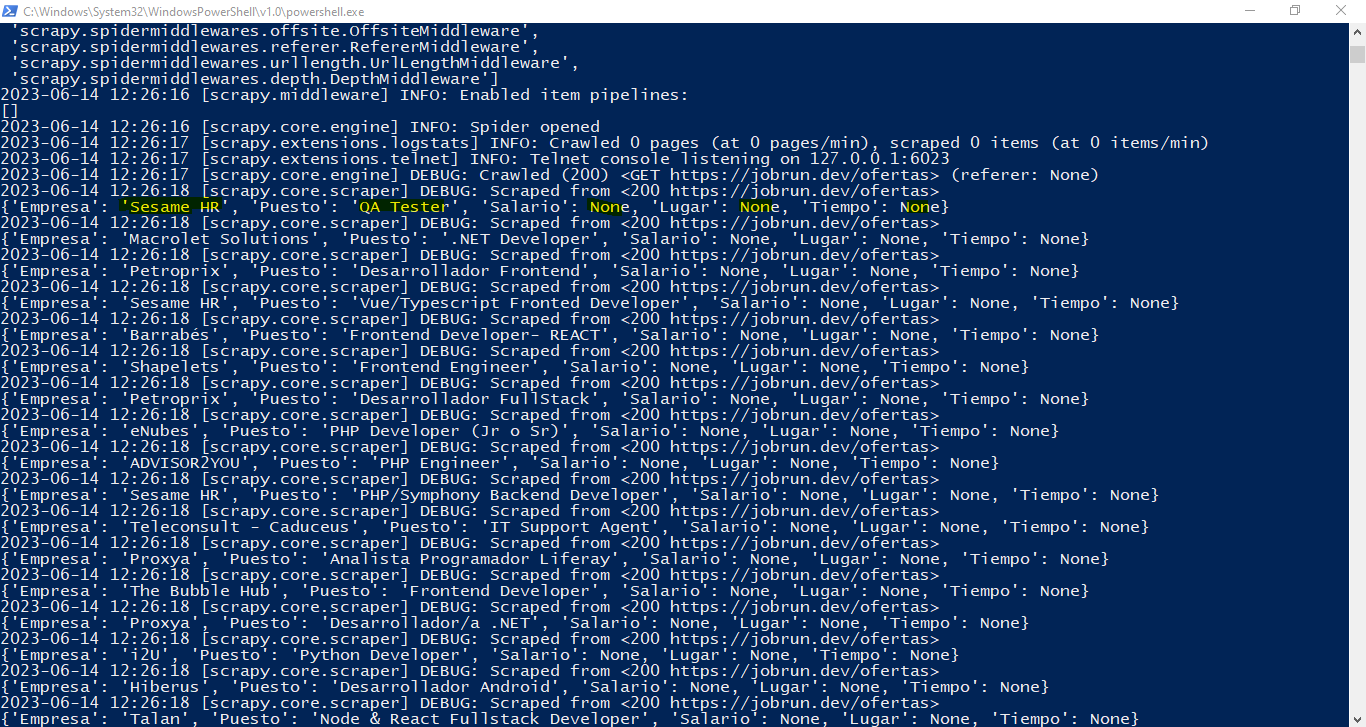